## search Tree -> similar word

In [1]:
csv_file = "sqlResult_1558435.csv"

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(csv_file, encoding="gb18030")

In [4]:
content = content.fillna('')  #replace NAN with ""

In [5]:
news_content = content['content'].tolist()

In [6]:
import jieba

In [7]:
def cut(string): return ' '.join(jieba.cut(string))

In [17]:
cut('这是一个测试')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\WATERD~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.182 seconds.
Prefix dict has been built succesfully.


'这是 一个 测试'

In [8]:
import re

In [9]:
def token(string):
    return re.findall(r'[\d|\w]+', string)

In [10]:
token('挺合适12\n3你好\n\r\t')

['挺合适12', '3你好']

In [11]:
news_content = [token(n) for n in news_content]

In [12]:
news_content = [' '.join(n) for n in news_content]

In [13]:
news_content = [cut(n) for n in news_content]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\WATERD~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.734 seconds.
Prefix dict has been built succesfully.


In [14]:
news_content[1]

'骁龙 835 作为 唯一 通过 Windows   10 桌面 平台 认证 的 ARM 处理器   高通 强调   不会 因为 只 考虑 性能 而 去 屏蔽掉 小 核心   相反   他们 正 联手 微软   找到 一种 适合 桌面 平台 的   兼顾 性能 和 功耗 的 完美 方案   报道 称   微软 已经 拿到 了 一些 新 的 源码   以便 Windows   10 更好 地 理解 big   little 架构   资料 显示   骁龙 835 作为 一款 集成 了 CPU   GPU   基带   蓝牙   Wi   Fi 的 SoC   比 传统 的 Wintel 方案 可以 节省 至少 30   的 PCB 空间   按计划   今年 Q4   华硕   惠普   联想 将 首发 骁龙 835   Win10 电脑   预计 均 是 二合一 形态 的 产品   当然   高通 骁龙 只是 个 开始   未来 也许 还 能 见到 三星 Exynos   联发科   华为 麒麟   小米 澎湃 等 进入 Windows   10 桌面 平台'

In [15]:
with open('news-sentences-cut.txt','w') as f:
    for n in news_content:
        f.write(n + '\n')

In [2]:
from gensim.models import Word2Vec

C:\Users\WATERDROP\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2019-11-09 10:02:44,513:INFO:'pattern' package not found; tag filters are not available for English


In [3]:
from gensim.models.word2vec import LineSentence

In [18]:
LineSentence?

In [38]:
news_word2ve = Word2Vec(LineSentence('news-sentences-cut.txt'), size=35, workers=8)

In [41]:
news_word2ve.save('news_w2v.model')

In [4]:
import logging
logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
model = Word2Vec.load('news_w2v.model')

2019-11-09 10:02:48,066:INFO:loading Word2Vec object from news_w2v.model
C:\Users\WATERDROP\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-11-09 10:02:48,648:INFO:loading wv recursively from news_w2v.model.wv.* with mmap=None
2019-11-09 10:02:48,648:INFO:setting ignored attribute vectors_norm to None
2019-11-09 10:02:48,648:INFO:loading vocabulary recursively from news_w2v.model.vocabulary.* with mmap=None
2019-11-09 10:02:48,648:INFO:loading trainables recursively from news_w2v.model.trainables.* with mmap=None
2019-11-09 10:02:48,648:INFO:setting ignored attribute cum_table to None
2019-11-09 10:02:48,664:INFO:loaded news_w2v.model


In [5]:
model_wv = model.wv

In [6]:
model_wv.most_similar("西班牙",topn=20)

2019-11-09 10:02:53,494:INFO:precomputing L2-norms of word weight vectors


[('瑞士', 0.8288657069206238),
 ('葡萄牙', 0.8240597248077393),
 ('奥地利', 0.8215550184249878),
 ('法国', 0.7847974300384521),
 ('苏格兰', 0.7693568468093872),
 ('意大利', 0.7653310298919678),
 ('丹麦', 0.7613569498062134),
 ('比利时', 0.7561818361282349),
 ('德国', 0.7513166666030884),
 ('索', 0.7488058805465698),
 ('加拿大', 0.7437841892242432),
 ('乌克兰', 0.7390468716621399),
 ('乌拉圭', 0.737348198890686),
 ('秘鲁', 0.7346332669258118),
 ('瑞典', 0.7110278606414795),
 ('捷克', 0.7094723582267761),
 ('比什凯克', 0.7080559730529785),
 ('阿根廷', 0.7049964666366577),
 ('爱尔兰', 0.7005467414855957),
 ('墨西哥', 0.6978057622909546)]

## More Data , Better Result

In [8]:
from collections import defaultdict

In [9]:
model_wv.most_similar('说', topn=10)

[('表示', 0.898147463798523),
 ('认为', 0.8717833757400513),
 ('指出', 0.850090742111206),
 ('坦言', 0.8084564208984375),
 ('看来', 0.7897093296051025),
 ('告诉', 0.7845112085342407),
 ('介绍', 0.7789624929428101),
 ('称', 0.7621525526046753),
 ('明说', 0.7503238916397095),
 ('透露', 0.740638256072998)]

In [10]:
def get_related_words(initial_words, model):
    """
    @initial_words are initial words we already know. is a list input
    @model is the word2vec model
    """
    unseen = initial_words
    
    seen = defaultdict(int)
    
    max_size = 500  # could be greater
    
    while unseen and len(seen) < max_size:
        #if len(seen) % 50 == 0: 
        #    print('seen length : {}'.format(len(seen)))
            
        #print(unseen)
            
        node = unseen.pop(0)#类似广度搜索
        
        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        #if seen['说']== 2:
        #    break
        
        seen[node] += 1
        
        # optimal: 1. score function could be revised
        # optimal: 2. using dymanic programming to reduce computing time
    
    return seen

In [11]:
related_words  = get_related_words(['说', '表示'], model_wv)

In [12]:
result_sorted = sorted(related_words.items(), key=lambda x:x[1], reverse=True)

In [13]:
result_sorted[:10]

[('指出', 92),
 ('说', 86),
 ('认为', 83),
 ('表示', 82),
 ('坦言', 81),
 ('透露', 62),
 ('特别强调', 61),
 ('明说', 53),
 ('强调', 53),
 ('称', 50)]

## TFIDF Key words

Term Frequency: 单词在某个文本中出现的频率
Inverse Document Frequency：单词中出现过的文本数量/所有文本数量

In [14]:
token_list = []
with open("news-sentences-cut.txt", encoding='gbk') as f:
    linestr = f.readline()
    while linestr != '':
        token_list.append(linestr.strip("\n").split())
        linestr = f.readline()

In [15]:
token_list[0]

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日',
 '起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI',
 '9',
 '的',
 '研发',
 '之中',
 'MIUI',
 '8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI',
 '9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息']

In [16]:
def document_frequency(word):
    # calculate 
    return sum(1 for linelist in token_list if word in linelist)

In [17]:
document_frequency("的")

70302

In [18]:
import math
def idf(word):
    return math.log10(len(token_list)/(document_frequency(word)+1))

In [19]:
idf('的')

0.10538746597539916

In [20]:
def tf(word, document):
    
    return sum(1 for w in document if word ==w)

In [21]:
tf("的",token_list[10])

4

In [22]:
# get all words tf-idf value in a document
def get_keywords_of_a_document(document):
    words = set(document)
    tfidf = [(word, tf(word,document) * idf(word)) for word in words]
    tfidf = sorted(tfidf, key=lambda x:x[1], reverse=True)
    
    return tfidf

In [23]:
get_keywords_of_a_document(token_list[20])[:10]

[('叙利亚', 28.329791466015845),
 ('军方', 10.955927553183711),
 ('俄罗斯', 9.166508898455875),
 ('美军', 8.705547970652418),
 ('袭机', 8.50678263891291),
 ('惹怒', 7.676835942971274),
 ('瞄准', 7.4170631425059685),
 ('备忘录', 7.217455980943028),
 ('IS', 6.894422690945135),
 ('暂停', 6.587175646639876)]

## Wordcloud

In [70]:
from wordcloud import WordCloud
import wordcloud

In [71]:
print(wordcloud.__version__)

1.5.0


In [72]:
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline

In [74]:
from PIL import Image
import numpy as np

## TFDEF Vectorized

### use TfidfVectorizer to calculate TFIDF value

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorized = TfidfVectorizer(max_features=10000)

In [26]:
sample_num =50000
sub_samples = token_list[:sample_num]

In [27]:
sub_samples = [' '.join(words) for words in sub_samples]

In [28]:
sub_samples[49999]

'新华社 北京 ５ 月 ４ 日电 题 安检 神器 膜法 净水 手机 智 造 科技 之光 闪耀 一带 一路 n 新华社 记者 n 建设 一带 一路 企业 要 发挥 主体作用 n 鼓励 本国 企业 参与 沿线 国家 基础设施 建设 和 产业 投资 积极 帮助 当地 发展 经济 增加 就业 改善 民生 推动 共建 丝绸之路 经济带 和 ２ １ 世纪 海上 丝绸之路 的 愿景 与 行动 明确指出 n 一带 一路 国际 合作 高峰论坛 召开 前夕 新华社 记者 深入 企业 采访 发现 伴随 某些 高新技术 领域 从 跟 跑 者 向 并 跑 者 甚至 领跑者 转变 越来越 多 的 企业 在 创新 驱动 下正 加快 走 出去 为 这条 互尊 互信 之 路 合作 共赢 之路 文明 互鉴 之路 不断 注入 新 动能 n 小标题 安检 神器 给 大家 一条 放心 的 安全带 n ４ 月底 的 北京 花红柳绿 n 密云 厂区 里 同方 威视 技术 股份 有限公司 的 装卸 师傅 正在 打包 一批 全新 的 安检 仪 一辆辆 近 ２ ０ 米长 的 大 货车 排着 队 准备 装载 各式各样 的 安检 神器 远行 n 这台 车载式 集装箱 检查 系统 马上 就要 运往 墨西哥 车间 内 调试 员 蔡志甫 正 调试 图像 语气 里 透 着 自豪 这辆 车 可 厉害 了 几分钟 内 便 可以 架起 一个 大 拱门 被 检 车辆 穿门而过 整台 车 的 安检 图像 就 显示 在 屏幕 上 我们 还 可以 用 切片 方式 观察 图像 就 像 用 鼠标 直接 打开 被 检 物品 n 记者 了解 到 目前 ２ 万多 套 各式 中国 造 安检 设备 正在 １ ５ ０ 多个 国家 和 地区 运行 为 当地 提供 安全 保障 在 英法 海底隧道 德国 汉堡 等 港口 都 能 看到 中国 神器 的 身影 在 亚美尼亚 泰国 等 国家 的 海关 不仅 装备 了 这些 中国 神器 还 配备 了 全方位 的 安检 解决方案 n 同方 威视 董事长 陈志强 说 密云 生产 基地 刚 建设 时 有人 认为 基地 太大 了 用 不了 而 现在 连 巴西 波兰 都 有 了 工厂 当地 生产 全球 销售 不仅 促进 了 所在国 就业 更 改善 了 当地 民生 小标题 膜法 净水 给 大家 提供 一台 好 的 净水器 n ２ ０ 

In [29]:
X = vectorized.fit_transform(sub_samples)

fit:就是求得训练集X的均值，方差，最大值，最小值,这些训练集X固有的属性。
transform:在fit的基础上，进行标准化，降维，归一化等操作

In [30]:
len(vectorized.get_feature_names())

10000

In [31]:
X.shape

(50000, 10000)

In [32]:
X[0].toarray()[0,[  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631]]

array([0.1089218 , 0.11230955, 0.14280663, 0.1082255 , 0.18905831,
       0.12707419, 0.13283808, 0.13102822, 0.19464211, 0.12276629,
       0.23501678, 0.10547917, 0.24067244, 0.10090281, 0.20284004,
       0.14248619, 0.17206486, 0.1170401 , 0.10521072, 0.15756729,
       0.14608465, 0.18915149, 0.19431067, 0.15715853, 0.19464211,
       0.12786643, 0.21740685, 0.1531887 , 0.14530811, 0.17750239,
       0.43301117, 0.12662109, 0.0833864 , 0.14489247])

In [33]:
import numpy as np

In [34]:
np.where(X[0].toarray())  #get the positions which values are not zero

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  35,   46,  302,  912,  933, 1546, 1743, 1819, 1844, 2558, 2635,
        2734, 3974, 4113, 4132, 4405, 4505, 4525, 4802, 4878, 5628, 5738,
        5760, 5808, 5892, 6195, 6880, 7319, 7338, 7607, 7662, 9082, 9141,
        9631], dtype=int64))

In [36]:
vectorized.vocabulary_

{'此外': 6195,
 '本周': 5892,
 '12': 35,
 '小米': 3974,
 '手机': 4878,
 '15': 46,
 '其余': 1844,
 '暂停': 5738,
 '更新': 5760,
 '发布': 2635,
 '开发': 4405,
 '影响': 4525,
 '确保': 7338,
 '工程师': 4132,
 '可以': 2734,
 '集中': 9631,
 '全部': 1743,
 '精力': 7662,
 '进行': 9141,
 '工作': 4113,
 '有人': 5808,
 '猜测': 6880,
 '主要': 912,
 '研发': 7319,
 '之中': 933,
 '去年': 2558,
 '一年': 302,
 '时候': 5628,
 '当然': 4505,
 '关于': 1819,
 '信息': 1546,
 '我们': 4802,
 '还是': 9082,
 '等待': 7607,
 '作为': 1440,
 '唯一': 2966,
 '通过': 9249,
 '10': 12,
 '平台': 4255,
 '认证': 8554,
 '处理器': 3331,
 '强调': 4481,
 '不会': 551,
 '因为': 3045,
 '考虑': 7980,
 '性能': 4642,
 '核心': 6069,
 '相反': 7212,
 '他们': 1242,
 '联手': 8020,
 '微软': 4579,
 '找到': 4949,
 '一种': 344,
 '适合': 9193,
 '兼顾': 1864,
 '完美': 3783,
 '方案': 5537,
 '报道': 5026,
 '已经': 4156,
 '拿到': 5092,
 '一些': 253,
 '以便': 1259,
 '更好': 5757,
 '理解': 6966,
 '架构': 6022,
 '资料': 8791,
 '显示': 5703,
 '一款': 332,
 '集成': 9638,
 '传统': 1355,
 '节省': 8201,
 '至少': 8132,
 '30': 103,
 '空间': 7498,
 '按计划': 5124,
 '今年': 1217,
 '联想': 8019,
 '首发': 982

### use tfidf value to calculate document similarities

$$ 1 - \frac{u \cdot v}
              {||u||_2 ||v||_2} $$

In [37]:
from scipy.spatial.distance import cosine

In [38]:
def distance(v1, v2): return cosine(v1, v2)

In [39]:
distance([1,0],[0,1])

1.0

In [40]:
cosine?

In [41]:
import random

In [212]:
random_choose = random.randint(0,1000)
random_choose

5

In [213]:
document_similarity = sorted(list(range(10000)),key=lambda i:distance(X[random_choose].toarray()[0], X[i].toarray()[0]))

C:\Users\WATERDROP\Anaconda3\lib\site-packages\scipy\spatial\distance.py:702: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [214]:
document_similarity

[5,
 4372,
 9,
 2867,
 3478,
 4515,
 14,
 4491,
 4257,
 4494,
 4518,
 4507,
 4558,
 2991,
 270,
 4502,
 4529,
 4186,
 11,
 4178,
 4488,
 2714,
 4498,
 4813,
 637,
 4195,
 7,
 4538,
 13,
 4525,
 23,
 117,
 290,
 282,
 264,
 4546,
 262,
 15,
 4483,
 605,
 4182,
 112,
 4521,
 4512,
 265,
 4533,
 266,
 4189,
 2904,
 4543,
 4174,
 3113,
 279,
 4192,
 268,
 21,
 4664,
 4739,
 632,
 4550,
 169,
 3124,
 2937,
 2897,
 3080,
 296,
 2943,
 18,
 3110,
 4977,
 3152,
 3085,
 488,
 3045,
 2998,
 3121,
 3190,
 2951,
 456,
 3054,
 2946,
 2583,
 2958,
 2883,
 4486,
 2882,
 343,
 10,
 522,
 4985,
 2899,
 2980,
 3172,
 2939,
 4743,
 3127,
 2578,
 630,
 293,
 4968,
 2587,
 2590,
 2948,
 4695,
 19,
 3161,
 2910,
 3002,
 4981,
 4643,
 3164,
 274,
 2954,
 4689,
 3133,
 101,
 4826,
 159,
 3118,
 2934,
 4516,
 88,
 3059,
 4166,
 3104,
 182,
 2961,
 3042,
 4179,
 2889,
 3144,
 3142,
 4554,
 4975,
 4735,
 3063,
 3107,
 616,
 4677,
 150,
 4668,
 2560,
 3035,
 260,
 4834,
 46,
 3048,
 3051,
 3131,
 3176,
 3166,
 28

In [216]:
''.join(token_list[5])

'受到A股被纳入MSCI指数的利好消息刺激A股市场从周三开始再度上演龙马行情周四上午金融股和白马股表现喜人但是尾盘跳水之后仅金融板块仍维系红盘状态分析人士认为金融股受益于MSCI纳入A股和低估值而重获资金青睐但是存量资金博弈格局下风格交替的震荡格局料延续流动性改善经济悲观预期修正等有助于支撑板块继而大盘指数逐步向好一九再现周四A股市场未能延续周三的上行态势两市成交小幅放量29个中信一级行业中收盘仅银行和非银行金融两个行业指数收红分别上涨180和020从二级行业来看股份制与城商行的涨幅最高达到222国有银行上涨082信托及其他上涨064保险板块上涨034证券板块上涨006银行板块25只成分股中共有21只收红其中招商银行涨幅最大上涨666贵阳银行上涨365上海银行华夏银行浦发银行和兴业银行的涨幅均超过150非银行金融板块44只成分股中共17只个股上涨其中安信信托中国太保涨幅居前两名分别上涨457和304西水股份华安证券中国人寿和新华保险的涨幅也均超过2相对而言券商股多小幅下跌近期对A股市场消息面影响最大的就是MSCI宣布从2018年6月开始将A股纳入MSCI新兴市场指数而其中金融股是占比最大的一个群体国金证券李立峰团队指出最新方案中包含的222只成分股中剔除了中等市值非互联互通可交易的股票以及有停牌限制的标的由于纳入了很多大市值AH股A股在MSCIEM中的权重由05上升到了073其中金融板块占比最高达到4011泛消费次之占比为2426两个板块涵盖了大部分权重股动态来看由于加入了很多是指占比高的金融公司金融板块的权重增加了近一半其他大部分行业权重都受到了稀释尽管A股被纳入MSCI这一利好事件对短期市场情绪有所提振对中长期海外增量资金预期升温但短期内市场量能尚不能有效放大金融股独乐乐情景也就难以持续存量博弈格局下风格交替指数震荡格局难改变光大证券指出利好并未引起市场太大的热情两市指数和成交量均较为平淡但市场风格出现了较大变化白马股金融股上涨的同时成长股题材股全天低迷这表明市场增量资金依然很少存量资金在不同板块之间腾挪这样的跷跷板格局使得指数难有突破市场中期依旧偏空短期依旧可能维持震荡格局'

In [217]:
''.join(token_list[4372])

'中国经济网北京6月21日讯今日两市早盘受A股冲关MSCI成功的消息影响而双双高开随后翻绿短暂冲高后呈现震荡横盘态势尾盘在上证50等权重股的带动下两市股指强势走强值得关注的是上证50指数以及中小板指数表现强势截至收盘沪指报315621点涨幅052深成指报1036717点涨幅076中小板指报681840点涨幅111创业板指报182469点涨幅020盘面上板块多数上涨家用电器领涨食品饮料汽车非银金融涨幅居前采掘领跌有色金属传媒轻工制造跌幅居前概念板块上涨跌互现白马股指数领涨京津冀一体化海绵城市水利水电建设指数涨幅居前小程序指数领跌粤港澳大湾区粤港澳自贸区网络安全指数跌幅居前消息面1环保部21日召开例行新闻发布会介绍土壤污染防治有关情况环保部土壤环境管理司司长邱启文在会上表示环保部在首批启动14个试点项目的基础上将指导各地新启动一批土壤污染治理与修复技术应用试点项目此外还将指导地方编制完成6个土壤污染综合防治先行区建设方案2受万科董事长王石从董事会卸任郁亮接棒消息影响万科企业在香港盘中大涨涨近3万科A盘中涨近23中央军民融合发展委员会第一次全体会议强调加强集中统一领导加快形成全要素多领域高效益的军民融合深度发展格局机构热议国信证券002736股吧明晟公司昨晚宣布将A股纳入MSCI新兴市场指数MSCI计划初始纳入中国A股的222只大盘股这些A股约占MSCI新兴市场指数073的权重上述消息发布后德银XTrackers嘉实沪深300160706基金吧中国A股ETF从下跌04转涨至2左右纳入MSCI指数虽然短期对市场影响有限但有助于提升本国资本市场的国际地位此外也能够倒逼股市改革提升监管水平随着资本市场的逐步开放和加入世界指数海外投资者将改变当地投资者的投资结构引导价值投资行为中金公司被纳入MSCIA股国际化的重要一步对市场情绪可能有一定的提振作用考虑到初期纳入标的数量不多初始纳入比例不高短期资金流入规模也不大我们初步估算流入资金量大约在150亿美元左右且相应个股年初至今已经累计了一定涨幅MSCI纳入A股短期对市场可能产生正面影响更重要的影响将在长期从长期来看海外投资者对A股参与度会进一步提升对A股的认知度和覆盖度上升市场机构化的趋势有望加速A股的投资风格逐步理性化在机制和制度上将逐渐走向完善对行业龙头影响偏积极尽管此次纳入短期对整体市场的有限正面作用但考虑到这样的结果可能一定程

In [218]:
''.join(token_list[9])

'6月21日A股纳入MSCI指数尘埃落定但当天被寄予厚望的券商股并未扛起反弹大旗22日在222只纳入MSCI指数的A股股票中银行股全线飘红其中招商银行领涨涨幅达666保险股和券商股的表现也可圈可点在这222只股票中金融板块的股票数量和总市值占比均位居首位分析人士指出银行股股息率高估值低收益稳定对于资金量较大投资期限较长的资金存在相当大的吸引力从国际经验来看纳入MSCI指数后相关股市的投资者风格将更加稳健更加偏好业绩稳定流动性好风险低的优质蓝筹股银行股具估值优势6月22日A股金融股表现强势板块涨幅达119据平安证券统计在222只纳入MSCI指数的A股股票中金融板块市值占比达4132其中银行证券和保险子板块的市值占比分别为2730775和624多家券商研究报告认为银行等金融股受到纳入MSCI指数的提振未来更多境外资金将进入金融股华泰证券表示在纳入MSCI指数之后A股将迎来约850亿元人民币的增量资金其中考虑到222只股票中金融股市值占比约42并且金融股体量大流动性强估值低符合境外资金偏好有望迎来超过权重的资金比例预计金融股有望吸引增量资金约350亿元人民币新富资本证券投资中心研究总监廖云龙认为银行股脱颖而出的主要原因是低估值市场预期银行股基本面改善同时市场整体风格偏保守偏爱低估值22日银行股的大涨是市场风格的延续是投资者对龙头股和对低估值的防御性选择东方财富choice统计的一季度末QFII重仓股数据显示银行股是QFII关注的重点之一在前五十大重仓股中北京银行南京银行宁波银行上海银行榜上有名'

## build binary search

根据输入的words输出最接近的document

### find the document which contain this word

In [42]:
X.shape

(50000, 10000)

In [43]:
X.transpose?

In [44]:
transposed_x = X.transpose().toarray()

In [45]:
transposed_x.shape

(10000, 50000)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer_test = TfidfVectorizer()
T = vectorizer_test.fit_transform(corpus)

In [47]:
vectorizer_test.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

In [48]:
word_2_id = vectorized.vocabulary_

In [49]:
word_2_id['今天']

1216

In [50]:
type(word_2_id)

dict

In [51]:
id_2_word ={d:w for w, d in word_2_id.items()}

In [52]:
id_2_word[500]

'上网'

In [53]:
from functools import reduce
from operator import and_

In [54]:
d1, d2, d3 = {1,2,3}, {4,5,6,3,2}, {1,3,5}

In [55]:
reduce(and_,[d1,d2,d3])

{3}

In [75]:
vectorized?

输入词组，返回文章排序
1. 获取query词组TFIDF向量
2. 找出query词的位置
3. 找出所有存在query的词的文章的索引号
4. 找出同时存在query中所有词的文章的索引号
5. 计算满足条件文章与query词的相似度并且排序
6. 返回排序后的文章id列表

In [56]:
def search_engine(query):
    """
    @query is the words to be searched, splited by space
    @return is the related documents which ranked by tfidf similarity
    """
    words = query.split()
    
    query_vec = vectorized.transform([' '.join(words)]).toarray()[0] #获取输入query词的TFIDF向量
    
    candidates_ids = [word_2_id[w] for w in words] #找出TFIDF向量中代表query词的位置
    
    #找出所有存在query的词的文章的索引号
    documents_ids = [ 
         set(np.where(transposed_x[_id])[0]) for _id in candidates_ids
    ]
    
    #找出同时存在query中所有词的 文章的索引号
    merged_documents = reduce(and_, documents_ids)
    
    # we could know the documents which contain these words
    # 计算 包含所有query的词的文章TFIDF值和 query的TFIDF的值的相似度
    sorted_docuemtns_id = sorted(merged_documents, key=lambda i: distance(query_vec, X[i].toarray()))

    return sorted_docuemtns_id

### 找到document里面的words并加粗显示

In [57]:
query = '美联储 加息 次数'
#search_engine(query)

In [59]:
search_engine(query)

[2189]

In [60]:
import re

In [65]:
re.compile??

In [61]:
text = """美国有线电视新闻网援新闻官员引美国军方官员的话说"""
pat = r'(新闻|官员)'
re.compile(pat).sub(repl="**\g<1>**", string=text) # \g<1> 代表前面pattern里面第一个分组在这里就是(新闻|官员)

'美国有线电视**新闻**网援**新闻****官员**引美国军方**官员**的话说'

In [62]:
def get_query_pat(query):
    return re.compile('({})'.format('|'.join(query.split())))

In [63]:
query = '美联储 加息 次数'
get_query_pat(query)

re.compile(r'(美联储|加息|次数)', re.UNICODE)

In [66]:
#对文中的pat中所compile得元素进行加粗处理，即文字前后加 **
def highlight_keywords(pat, document):
    return pat.sub(repl="**\g<1>**", string=document) 

In [67]:
highlight_keywords(get_query_pat('美军 司令 航母'), ''.join(token_list[22987]))

'新华社北京４月１０日电新闻分析卡尔文森号**航母**缘何成西太平洋军情新主角n新华社记者刘莉莉n美国海军第三舰队下属的卡尔文森号**航母**打击群即将抵达西太平洋朝鲜半岛附近水域分析人士认为美方此次急调**航母**打击群北上向朝鲜施压意图明显很可能会加剧朝鲜半岛紧张局势n小标题侧重对地攻击n据第三舰队网站主页发布的消息**美军**太平洋**司令**部**司令**哈里哈里斯指示卡尔文森号**航母**打击群从新加坡向北航行这一打击群还包括海军第二航空队两艘阿利伯克级导弹驱逐舰和一艘泰孔德罗加级导弹巡洋舰n卡尔文森号是尼米兹级核动力**航母**母港位于美国加利福尼亚州的圣迭戈今年１月初卡尔文森号曾前往西太平洋地区执行任务并参与美日韩三国军事演习尼米兹级**航母**是核动力多用途**航母**也是美国海军远洋作战群的核心力量n卡尔文森**航母**打击群中阿利伯克级导弹驱逐舰和泰孔德罗加级导弹巡洋舰也不可小视阿利伯克级导弹驱逐舰是世界上最先配备四面相控阵雷达的驱逐舰舰队防空是其主要作战任务泰孔德罗加级导弹巡洋舰的武器配备也比较全面涵盖了反潜反舰防空和对地４个种类n据军事专业人士介绍**航母**打击群与**航母**战斗群其实是两个概念战斗群侧重于夺取制海权例如海战而**航母**打击群更侧重于对地攻击作战一般而言打击群的舰艇数量要远少于战斗群n小标题配角跻身主角n第三舰队是美国海军太平洋舰队两大舰队之一拥有４个**航母**打击群分别是以卡尔文森号为核心的第一**航母**打击群以约翰斯坦尼斯号为核心的第三**航母**打击群以西奥多罗斯福号为核心的第九**航母**打击群和以尼米兹号为核心的第十一**航母**打击群n资深军事评论员石宏说在美国海军力量中第三舰队原本地位一般因为其所管辖的国际日期变更线以东的东太平洋比较安稳所以更多扮演战略预备队的配角角色只有在负责执行前沿部署和应急反应任务的第七舰队有需要时第三舰队才会奉令前去换班或增援但自２０１５年下半年以来太平洋舰队打破了延续数十年的惯例大幅提升第三舰队的活跃度令其开始更多涉足西太平洋地区n实际上这是**美军**根据新的全球一体化军事战略而做的调整目的是优化资源改变本土与前沿的兵力平衡缓解目前美国海军兵力不足与战线过长资源下滑与保持战备之间的尖锐矛盾石宏说n正因如此卡尔文森号**航母**开始忙碌起来自从今年１月离开母港后卡尔文森号边走

In [68]:
from IPython.display import display, Markdown

In [69]:
#找到与query词相似的文章，并在文章中加粗query中所含的单词
def search_engine_with_pretty_print(query):
    candidates_ids = search_engine(query)
    for i, _id in enumerate(candidates_ids):
        title = '## Search Result {}'.format(i)
        c = ''.join(token_list[_id])  #c = content['content'][_id] 因为这里没导入content文件，直接用token合并进行处理
        #print(c)
        c = highlight_keywords(get_query_pat(query), c)    
        
        display(Markdown(title + '\n' + c))

In [70]:
Markdown('美国有线电视**新闻**网援**新闻****官员**引美国军方**官员**的话说') #连在一起会出现这个问题

美国有线电视**新闻**网援**新闻****官员**引美国军方**官员**的话说

In [71]:
query = '春节 假期'
search_engine_with_pretty_print(query)

## Search Result 0
最近不少人在朋友圈等个人社交媒体上吐槽打车难人们发现不仅在早晚高峰甚至是传统的非高峰时段都出现了路上扬招成功率越来越低打车软件不加价或是加价少难以吸引司机接单的情况而类似的情况在上海北京武汉等地都或多或少地存在对此一些城市迅游车的驾驶员们表示历年**春节**前都会遇到活多车少的情况对司机而言能加价赚到钱何乐而不为呢21日晚8点滴滴高级产品总监罗文在知乎上发文回应称根据后台数据显示今年司机回家早运力下降在其晒出有关滴滴在线司机数据和北京订单需求的两张手绘图表中虽然隐去了具体数值但可以明显看出前一张图表近期呈现了直线下降趋势标注数据显示下降超过25而出行订单数量则同期上涨了3成不过在线司机变少的情况仅仅是因为临近**假期**专车司机纷纷提早回家过年造成的吗相关数据显示自去年国庆之后地方版网约车新政陆续出台后市场上的网约车供给量就呈现出大幅减少的趋势以上海为例网约车新政之后上海合规的网约车数量只有1万辆左右市场供给大幅减少打车难开始悄然回潮与此同时网约车市场过度集中部分平台一家独大也让消费者瞬间难以从补贴优惠的温情脉脉中回过神来瞬间跌入了加价才能叫到车的冰冷现实中一位Uber中国早期员工指出滴滴打车软件自动设置了加价选项即便第一次加价没被接单还可以再次加价叫车司机知道用户可以多次选择加价就有意不接那些不加价的单子他知道你叫不到车就会提高小费就故意等着于是这个潜规则的结果就是乘客反复加价才能叫到车既浪费了时间也付了更多的钱对于近日有消费者称打车难打车贵的问题23日下午滴滴出行官方微博发布致广大用户的一封信表示将从即日起在全国范围内阶段性取消出租车建议调度费功能以减少因为春运期间本身供不应求和价格因素带来的体验问题滴滴方面表示此举将有可能给部分乘客带来呼叫等待时间的增加以及打车成功率降低的影响不过为了鼓励在**春节**期间坚持出车的司机师傅仍会保留用户主动给予调度费的功能**春节**过后会根据用户的反馈再做决策并强调所有调度费滴滴分文不取

## Search Result 1
n新华社上海4月4日新媒体专电题中国人愿意为旅游投入更多时间和金钱n新华社记者陈爱平许晓青n28岁的上海白领林夏今年清明节没有留在家乡而是提前请了年假赴印度洋上的岛国斯里兰卡自助游n一个人全部花费不超过1万元人民币约等于一个月的工资完全可以负担得起她说n对于不少中国人来说旅游已经成为一种生活必需品nn图为在上海市徐汇区的一家旅行社门店一位市民询问欧洲游情况新华社记者陈爱平摄nn除了扫墓祭祖踏青赏花中国的清明节**假期**也成为出游旺季国内游出境游人数都不可小觑n前不久记者来到上海市黄浦区出入境办证中心大厅工作人员说今年以来前来办理出入境证件的居民络绎不绝尤其是祖孙三代一起来办理证件的全家出行者增多除了**春节**七天长假还有清明五一端午等三天左右的小长假这些**假期**到来前的一个月突击办理出入境证件的居民往往会扎堆n中国2016年国民经济和社会发展统计公报显示2016年全国国内游客44亿人次比上年增长112国内居民出境13513万人次增长57n旅游消费旺盛的趋势在2017年开年后仍然延续根据中国国家旅游局数据中心综合测算2017年**春节**期间全国共接待游客344亿人次同比增长138实现旅游总收入4233亿元同比增长159nn斯里兰卡的狮子岩景区由林夏提供nn远在北欧的瑞典当地的旅游主管部门也感受到了中国人越来越高涨的出游热情n统计显示2017年1月中国游客在瑞典全国的间夜量衡量酒店在一定时间内出租率的计算单位同比增长742同期瑞典首都斯德哥尔摩总间夜量增长超过10其中中国游客增长幅度最为显著高达82n瑞典旅游局中国区首席代表李春梅表示瑞典冬季旅游市场在中国发展迅速得益于中国游客对于新鲜目的地和独特旅游体验的旺盛需求n在线旅行社携程旅行网近日发布的2017中国旅游者意愿调查报告研判中国人愿意为旅游投入更多的时间和金钱n报告称2017年98的受访者有出游意愿其中计划出行频次13次的受访者占比72计划出行46次的受访者占比19n作为一种必需品旅游正成为中国人消费的重要支出同是携程这份根据25亿会员进行的随机抽样调查及大数据分析报告显示57的受访者预计全年旅游花费占年收入的10以上19的受访者甚至愿意将20的年收入用于旅游从具体金额来看73的受访者表示全年旅游人均花费将超过1万元nn超过5成受访者预计全年旅游花费占年收入的１０以上由携程旅行网提供nn林夏在接受采访时也证实自己花费在旅游上的年均消费大约为2万元n专家分析随着中国居民收入提升在旅游方面的支出提升成为居民消费升级的例证多花一点钱可以多体验一点旅行的幸福感这成为大部分游客的一项共识n也正是基于上述原因多家在线旅行社大数据显示越来越多的中国居民愿意选择更舒适的酒店体验美食和享受服务旅游产品亦更加多样化定制游自由行等选择空间更大亲子游中老年游等满足社会多层次需求的旅游产品在2017年将持续火爆n从出行时间看携程报告显示随着带薪休假制度的落实以及中国居民出行观念的改变利用年假周末出游的受访者分别占比527及19n清明节**假期**仅4月2日当天上海顾村公园就刷新了接待游客纪录迎来1829万人驴妈妈旅游网分析今年国内赏樱游人次预计同比增长近7成n驴妈妈旅游网介绍赏花亦是近期出境旅游的热词之一清明节前后赴日赏樱游预订人次较去年同期增加了近3成nn无锡十八湾风景区赏花游人络绎不绝由驴妈妈旅游网提供nn上海财经大学旅游管理系主任何建民分析旅游成为中国居民的必需品亦成为中国国民经济的必需品见证着中国正在推进的供给侧改革n中国国家旅游局数据显示全国旅游直接投资在2016年达到12997亿元同比增长2905而据联合国世界旅游组织测算2016年中国旅游业对国民经济综合贡献率达11对社会就业综合贡献超过1026n此前中国发布的十三五旅游业发展规划提出十三五时期旅游业对国民经济的综合贡献度达到12对餐饮住宿民航铁路客运业的综合贡献率达到85以上年均新增旅游就业人数100万人以上n今年3月初公布的十三五全国旅游公共服务规划重点部署了未来旅游公共服务发展的16项重点工程专家认为这将为中国居民出游提供更好保障n我计划每年至少到境外旅游一次这样在下一次更换护照的时候又会收集到更多各国特色的出入境签证及印章加上国内游短途游今后还会花更多钱和时间去享受旅行林夏说n

## Search Result 2
新华社北京3月31日电记者魏梦佳钟雅记者31日从北京市公园管理中心获悉今年清明假日期间北京市属11家公园及中国园林博物馆将举办25项假日游园活动其中各大公园内总面积近1000公顷的主题赏花景区将掀起市民游客游园赏花热潮n目前北京各大公园内一片春意盎然各类春花正热闹绽放北京市公园管理中心表示今年春季市属11家公园的春花观赏面积达到了园内绿地面积的70除了常年定植的四季花木各园还采用了花期调控精品盆栽室内花展等多种技术手段和展示方式使今春花卉布置总面积增加近10n今年清明**假期**各园近千公顷的赏花景区将成为市民游客度假的首选玉渊潭公园的樱花节陶然亭公园的海棠春花节中山公园的郁金香展北京植物园的桃花节等**春节**赏花活动都已展开各色春花依山傍水争相吐艳本周末还将迎来新一轮盛花期其中陶然亭公园栽植和展出的海棠达45个品种3000多株n除赏花外清明诗会民俗展示文化展演主题纪念等多种展示清明文化的活动也将在陶然亭公园玉渊潭公园中国园林博物馆等上演香山公园双清别墅中山公园孙中山像等13处北京公园爱国主义教育基地也将迎来大批前来缅怀祭扫的游客市民清明期间各公园内的祭扫纪念景区将市民及团体提供讲解举行纪念仪式牌示导览等服务完n

## Search Result 3
即将进入7月对于城市学生而言美好的暑假又如期而至了而对于另一群人留守儿童而言迎接他们的却是一个冷清的**假期**离开了学校没有了老师和同学的陪伴也没有父母的守护他们的**假期**是孤单而乏味的记者从清远相关部门获悉清远农村留守儿童约239万名数量在全省排名第四留守儿童长期缺乏亲情关爱和有效保护处境堪忧为做好农村留守儿童关爱保护工作促进农村留守儿童健康成长近年来清远不断完善制度方案为留守儿童撑起保护伞就在今年4月份清远市政府常务会议审议了清远市关于加强农村留守儿童关爱保护工作的实施方案稿提出建立考核机制强化激励问责对成效明显的按照国家有关规定予以激励对工作不力措施不实造成不良影响的按规定追究相关人员的党纪政纪责任造成严重后果的将对有关领导进行问责清远市心理学会会长张万英认为不能让留守儿童成为缺爱儿童不能经常和孩子在一起生活的父母要争取多与孩子保持常态联系不要让留守儿童成为无助儿童政府要完善社区中留守儿童服务的功能关注学生成长中遇到的生理心理问题采写整理魏金锋半年难见爹和娘的无奈每年七八月间都是清远最热的时段而往日喧闹的校园一到这时便进入**假期**一片沉寂留守儿童真凄凉半年难见爹和娘放学回家忙家务夜里梦中唤爹娘是农村留守儿童的真实写照在粤北山区的清远市农村半年难见爹和娘的儿童实在是太普遍了为了给家人更好的生活环境许多青壮年选择了背井离乡他们像候鸟一样每年**春节**刚过便飞向沿海各个城市打工直到下一个**春节**的到来半年甚至几年不回家也是常有的事对于很多父母在外务工的农村留守儿童而言无论是留在家里还是到父母身边团聚怎样度过长达两个月的暑假都是个难题一位经常在清远参加各种公益活动的志愿者刘小姐说很多次当他们乘坐的车子进入到村头时就像突然注入了活力一般孩子们三三两两飞奔过来小村瞬间变得生动起来孩子们好奇地围着大巴转因为他们盼望父母会从车上走下来可惜不是目前清远农村留守儿童数量在全省排名第四留守儿童因为家庭环境的特殊性在性格方面容易出现孤僻偏激冲动攻击性比较强等缺陷而亲情的缺乏和监管的缺失让他们更容易受到外界因素的伤害笔者走访了解到喜的是由于父母不在身边不少留守儿童在艰难的环境中早早学会了生存的技能变得顽强独立忧的是个别留守儿童因为缺乏大人监管安全隐患重重留守儿童也牵动着政府的心近年来清远各地通过政府购买服务等形式探索和创新解决留守儿童问题的方式和途径取得一定成效但依旧任重道远还需不断健全关爱留守儿童的法律和政策体系强化父母法定监护责任等途径缓解留守儿童问题亲情缺失监管缺乏的隐患由于外出打工的父母长年累月难得有机会回一趟家留守儿童缺乏父母的监护和保护往往容易遭受伤害比如溺水烧伤车祸甚至是性侵等等其实我们也知道父母长期不在家对孩子的身心健康和学习会带来负面影响但这是痛苦无奈的选择家住清远阳山的何先生夫妇感慨良多他家有一双儿女由于家里田地少经济窘困在小女儿断奶后就把孩子留给年迈的父母抚养夫妇俩到了佛山打工一干就是9年多每半年夫妻俩才轮流回家一两天9年过去了夫妻俩好不容易挣了一些钱去年回家盖起了新楼并添置了一批家用电器可谁知由于他俩长年不在家两个孩子对父母的感情似乎都很生疏大儿子经常逃学小小年纪学会了抽烟饮酒让这何先生夫妇非常伤心业内人士指出留守儿童之所以容易出问题主要还是思想道德教育得不到足够的重视由于学校师资力量及父母不在身边教育的原因留守儿童思想道德教育被严重忽视隔代监护人大多忙于务农无暇教育儿童而且隔代监护人由于自身素质限制教育水平不高手段不当不少留守儿童隔代监护人采取暴力手段教育儿童错误的教育方式导致错误的教育成果此外由于农村师资力量水平的限制留守儿童在音乐美术舞蹈等艺术类学习上机会非常少甚至是基本空白乡村小学对体育课心理健康教育课的师资投入极少留守儿童长期得不到心理生理健康教育上的辅导导致容易出现沉迷网络电视及抽烟喝酒等不良习惯让留守儿童的暑假不再孤单张万英认为留守儿童因为家庭环境的特殊性在性格方面容易出现孤僻偏激冲动攻击性比较强等缺陷人格上容易出现精神问题如抑郁症焦虑恐惧人际交往障碍等在学习方面容易出现学习落后缺乏动力等跟家庭关系也会相对紧张容易跟家里人产生冲突难以和谐相处农村留守儿童问题需要家庭学校和社会的共同努力一是加快新农村建设和小城镇建设吸引外出农民工返乡就业创业使留守儿童能够与父母团聚二是学校要加强对留守儿童的关爱和照顾可通过及时家访定时为孩子做心理疏导等方式多方位关爱留守儿童的身心健康三是政府要健全关爱留守儿童的法律和政策体系完善监护制度和国家救助体系强化父母法定监护责任张万英认为不要让留守儿童成为缺爱儿童不能经常和孩子在一起生活的父母要争取多与孩子保持常态联系经常打电话关心孩子了解他们的心理需要给予更多的心理关爱如发现自己孩子出现异常行为要及时和孩子沟通避免孩子走上极端的道路业内人士指出相对于父母在身边的孩子不同留守儿童的暑假一般只有三个选择而这三个选择都潜伏着很大的安全隐患一是乘车前往父母所在地与父母一起度过**假期**旅途比较危险尤其是独自前往二是在家帮助爷爷奶奶干活小小年纪很容易出现安全事故三是自由安排这是最危险的没有大人看护孩子极有可能出事该业内人士建议要给孩子制定好科学作息时间有大人在家的应该严厉监督别让孩子养成坏习惯在制定作息时间时父母们应该以少量平均的安排学习任务避免孩子荒废学业有大人家督可以很好地防止孩子到处乱跑引发安全事故因为暑假不像平时在学校孩子有同学朋友相伴长时间的呆在家里孩子很容易孤单这需要父母的关怀来开解不然很容易让孩子的叛逆情绪增长起来甚至让孩子逐渐自闭此外不妨借用智能设备掌握孩子行踪避免孩子靠近危险地带或出入禁止未成年人进入的场所把影响孩子成长的一切不安因素拒之千里聚焦超6个月不履行职责或撤销监护资格清远市关于加强农村留守儿童关爱保护工作的实施方案指出建立农村留守儿童摸底排查机制按照属地管理分级负责的原则建立县镇村居委会关爱农村留守儿童三级工作服务网络建立农村留守儿童发现报告机制民政部门要会同财政教育卫计公安住建团委等部门和单位建立社会参与面广覆盖面大渠道顺畅和相应快速的留守儿童报告网络制定留守儿童信息报告激励办法鼓励社会各界积极参与留守儿童关爱保护工作对实施家庭暴力虐待或遗弃农村家庭留守儿童的父母或受委托监护人公安机关应当给予批评教育必要时给予治安管理处罚情节恶劣构成犯罪的依法立案侦查对于监护人将农村留守儿童置于无人监管和照看状态导致其面临危险且经教育不改的或者拒不履行监护职责6个月以上导致农村留守儿童生活无着的或者实施家庭暴力虐待或遗弃农村留守儿童导致其身心健康严重受损的其近亲属村居委会县民政部门等有关人员或单位要依法向人民法院申请撤销监护人资格另行指定监护人方案指出父母要依法履行对未成年子女的监护职责和抚养义务外出务工人员要尽量携带未成年子女共同生活或父母一方留家照料暂不具备条件的应当委托有监护能力的亲属或其他成年人代为监护不得让未满16周岁的儿童脱离监护单独居住生活外出务工时父母要向当地村居委会报告外出务工及留守儿童委托监护人的情况父母或其他监护人不依法履行监护职责村居委会公安机关和有关部门要及时上门予以劝诫制止情节严重或造成严重后果的公安机关等要依法追究其责任强化家庭监护主体责任加大教育部门和学校关爱保护力度各县级政府要完善控辍保学部门协调机制督促监护人送适龄儿童少年入学并完成义务教育教育部门要负责落实免费义务教育和教育资助政策确保农村留守儿童不因贫困而失学改善留守儿童教育条件加强留守儿童教育基础设施建设优化农村义务教育学校布局关注如何防止留守儿童溺亡悲剧清远是依山傍水的城市每到夏季游泳是不少人的至爱尤其在学生放**假期**间江河边戏水似乎成了一种不可或缺的乐趣可惜几乎每年都有学生溺水身亡的事故发生留守儿童的安全一直是个大问题在上学时有学校的约束还好可是一旦放假后父母又不在身边家里老人又看不住孩子孩子的身边就像埋藏了无数颗炸弹而且儿童自救能力较差不少去玩水的儿童都不会游泳但在同伴邀约下冒险下水嬉戏溺水后由于同伴大多年纪小能力有限一旦遇险惊慌失措难以互救极易发生群体溺亡事故笔者从清远市教育部门获悉近年来清远全市因溺水事故死亡学生每年都有10人左右占所有非正常死亡学生数的大约一半为此今年5月份召开的清远全市防溺水视频工作会议强调各地各部门要把预防学生溺水工作纳入当前重要议事日程抓好辖区内中小学幼儿园安全管理加强安全宣传教育强化周边水域排查加强隐患整改对因制度不健全管理不到位责任不落实导致安全责任事故的将按照有关规定严肃追究相关人员的责任学校还要会同村委会社区居委会做好校园及其周边溺水安全隐患的排查一方面要在校内水池河道沟渠等易发生溺水的地方设置警示标志加强防护设施另一方面要通过教师学生家长或社区居委会村委会摸清学校周边各类江河池塘溪流等水域的安全隐患在校内提前对学生进行安全警示据悉清远市政府将组织相关人员成立督查组对各地及相关部门的防溺水工作落实情况进行督查对发生安全事故的要按照四不放过原则加强责任追究对因制度不健全管理不到位责任不落实导致安全责任事故的要按照有关规定严肃追究相关人员的责任

## Search Result 4
中国新闻nn公鉴关于新华全媒新闻服务平台上线的公告nn脱贫攻坚6云南禄劝苗寨村民易地搬迁过上新生活nn新华社摄影部今日重要稿件预告nn图片故事10挠挠所长履职记nn新华视点图片版2港珠澳大桥岛隧工程海底隧道的最终接头对接完成nn法治8中意警方在沪联合巡逻nn时代先锋图文互动5仰望最亮星勿忘造星人记航天科技集团五院通信卫星创新团队nn文化8民族翰骨潘天寿诞辰120周年纪念大展在京开幕nn文化2校园里的朗读者nn图文互动5台籍青年教师黄志伟我在武汉找到了舞台新华旺中台胞在大陆联合采访报道之二nn一带一路5一带一路好日子元旦nn一带一路5一带一路好日子**春节**nn一带一路5一带一路好日子泼水节nn一带一路4一带一路好日子洒红节nn一带一路4一带一路好日子诺鲁孜节nn社会2铁路青年工地约会觅良缘nn经济河北宣化发展现代农业助农增收nn经济2河北宣化打造高端装备制造产业集群nn服务3西安高速公路收费站开通手机支付业务nn文化3东京审判为了世界和平一书国内首发nn社会2校园倡清风nn社会3重温入团誓词传承五四精神nn体育2排球朱婷回乡与媒体球迷互动nn社会4扎根农村干事业村官摸索致富路nn体育1自行车第五届环巴松措国际山地自行车赛落幕nn社会4高铁微客服受旅客欢迎nn时政张高丽会见阿联酋外交与国际合作部长阿卜杜拉nn新华全媒头条图文互动10港珠澳大桥全线贯通在即粤港澳大湾区加速起航nn社会2辽宁海警开展清查整治三无船舶专项行动nn环境乌鲁木齐遭遇短时雨雪冰雹天气nn社会5港珠澳大桥工程上的大国重器nn体育2足球足协杯杭州绿城胜辽宁开新nn经济3三峡船闸累计货运量突破10亿吨nn社会3内蒙古大兴安岭北部火场外线合围明火被扑灭nn环境3湖北宣恩鸽子花悄然开放nn社会4山西永济鹳雀楼前旗袍秀nn图片故事7苗乡90后草根乐队寻梦记nnn国际新闻nnXHDW2奥地利外长访问利比亚nn国际5德国一快速列车在多特蒙德中央火车站发生出轨事故nn国际5非洲火人节收官nn新华视界10在纽约寄兴园体验中国园林之美nn国际10在纽约寄兴园体验中国园林之美nnXHDW重庆芭蕾舞团参加阿尔及利亚国际现代舞艺术节nn国际10美国各地民众举行劳动节游行nn国际3圣彼得堡举行五一劳动节游行nn国际哈马斯发布新政策文件接受划界建国nn一带一路好项目7蒙内铁路肯尼亚的铁路中国造nnXHDW3第48届休斯敦国际海洋油气技术大会及设备展开幕nn国际图文互动专访中国的发展将对欧洲未来发展产生重大影响访匈牙利外交与对外经济部长西亚尔托nn国际图文互动3走进挪威峡湾深处的书镇nn国际中国海军远航访问编队结束访问离开菲律宾nnXHDW5昂山素季访问欧盟nn国际6科学家丁肇中的日常生活nn国际9韩国举行最后一次总统候选人电视辩论nn国际4以色列庆祝独立日nn新华视界5以色列庆祝独立日nn一带一路好项目11中国企业承建特拉维夫轻轨项目nn国际5德国一快速列车在多特蒙德中央火车站发生出轨事故nn国际5非洲火人节收官nn国际10在纽约寄兴园体验中国园林之美nn国际10美国各地民众举行劳动节游行nn国际3圣彼得堡举行五一劳动节游行nn国际哈马斯发布新政策文件接受划界建国nn一带一路好项目7蒙内铁路肯尼亚的铁路中国造nn国际图文互动专访中国的发展将对欧洲未来发展产生重大影响访匈牙利外交与对外经济部长西亚尔托nn新华社摄影部2017年05月02日白班发稿目录国际对内nn国际图文互动3走进挪威峡湾深处的书镇nn国际中国海军远航访问编队结束访问离开菲律宾nn国际6科学家丁肇中的日常生活nn国际9韩国举行最后一次总统候选人电视辩论nn国际4以色列庆祝独立日nn一带一路好项目11中国企业承建特拉维夫轻轨项目nnn体育专线nn一发专线稿件n体育8斯诺克塞尔比夺得世锦赛冠军n体育6足球英超联赛利物浦客场告捷n体育6篮球NBA季后赛火箭胜马刺n体育7篮球NBA季后赛骑士胜猛龙n体育5排球朱婷回乡与媒体球迷互动n体育2自行车第五届环巴松措国际山地自行车赛落幕n体育5足球在葡萄牙托里什人队训练的中国小球员n体育8足球足协杯呼和浩特小草胜长春亚泰n体育5足球足协杯杭州绿城胜辽宁开新n体育7足球足协杯山东鲁能胜吉林百嘉nn二发对外稿件nXHDW体育10篮球香港甲一男子篮球联赛赛况nnn图表专线nn公鉴关于新华全媒新闻服务平台上线的公告nn图表财经股市纽约股市涨跌互现nn图表财经金价纽约金价1日大幅下跌nn图表财经油价纽约油价1日下跌nn图表突发事件哥伦比亚一军用飞机坠毁nn图表科技科普冥想有助集中精力nn新华社摄影部2017年05月02日白天发稿目录图表专线nn图表关注五一五一**假期**全国铁路发送旅客近4900万人次nn图表漫画财经聚焦美化nn图表漫画财经聚焦突击增长nn图表漫画科技成功破译nn图表科技月掩恒星轩辕十四罕见天象5月4日上演nn图表经济美财长说美国经济有望实现3增长目标nn图表漫画新华视点签约nn图表漫画解读经济开局季民生工程精神敬老nn图表受权发布国务院关于修改大中型水利水电工程建设征地补偿和移民安置条例的决定nn图表漫画解读经济开局季民生工程精神孤独nn图表财经动态深圳新房均价出现七连跌4月成交量环比大涨146nn图表经济财政部物流企业大宗商品仓储用地土地使用税享50优惠nnn外代图片一线nn外代一线9德国一快速列车在多特蒙德中央火车站发生出轨事故nn外代一线10美国得州一大学校园发生持刀扎人事件nn外代一线5阿联酋与德国讨论地区安全形势nn外代一线12马杜罗宣布将启动制宪大会重新制定宪法nn外代一线2奥地利外长表示将继续支持利比亚民族团结政府nn外代一线6哈马斯发布新政策文件接受划界建国nn外代一线7加拿大多伦多金融区传出爆炸声nn新华社摄影部2017年05月02日白班发稿目录外代图片一线nn外代一线9摩苏尔战事nn外代一线18特朗普说愿在合适情况下与金正恩会面nn外代一线2朴槿惠案首次预审在首尔举行辩方律师否认全部指控nn外代一线5昂山素季访问欧盟nn外代一线4韩国举行最后一次总统候选人电视辩论nn外代一线13以色列庆祝独立日nnn外代图片二线nn外代二线印度传统婚嫁日nn1外代二线城市里的农民nn2外代二线城市里的农民nn3外代二线城市里的农民nn4外代二线城市里的农民nn5外代二线城市里的农民nn6外代二线城市里的农民nn7外代二线城市里的农民nn8外代二线城市里的农民nn9外代二线城市里的农民nn6外代二线戈马舞蹈节nn1外代二线彩色烟雾nn2外代二线彩色烟雾nn3外代二线彩色烟雾nn4外代二线彩色烟雾nn5外代二线彩色烟雾nn6外代二线彩色烟雾nn7外代二线彩色烟雾nn6外代二线墨西哥航空航天展闭幕表演nn7外代二线墨西哥航空航天展闭幕表演nn8外代二线墨西哥航空航天展闭幕表演nn1外代二线墨西哥航空航天展闭幕表演nn2外代二线墨西哥航空航天展闭幕表演nn3外代二线墨西哥航空航天展闭幕表演nn4外代二线墨西哥航空航天展闭幕表演nn5外代二线墨西哥航空航天展闭幕表演nn10外代二线戈马舞蹈节nn3外代二线福塔莱萨海滨风光nn4外代二线福塔莱萨海滨风光nn1外代二线福塔莱萨海滨风光nn2外代二线福塔莱萨海滨风光nn1外代二线俄罗斯摩托车节表演nn2外代二线俄罗斯摩托车节表演nn3外代二线俄罗斯摩托车节表演nn4外代二线俄罗斯摩托车节表演nn5外代二线俄罗斯摩托车节表演nn6外代二线俄罗斯摩托车节表演nn7外代二线俄罗斯摩托车节表演nn1外代二线波兰举行第24届蒸汽机车游行nn2外代二线波兰举行第24届蒸汽机车游行nn3外代二线波兰举行第24届蒸汽机车游行nn4外代二线波兰举行第24届蒸汽机车游行nn5外代二线波兰举行第24届蒸汽机车游行nn6外代二线波兰举行第24届蒸汽机车游行nn7外代二线波兰举行第24届蒸汽机车游行nn8外代二线波兰举行第24届蒸汽机车游行nn9外代二线波兰举行第24届蒸汽机车游行nn10外代二线波兰举行第24届蒸汽机车游行nn11外代二线波兰举行第24届蒸汽机车游行nn12外代二线波兰举行第24届蒸汽机车游行nn13外代二线波兰举行第24届蒸汽机车游行nn14外代二线波兰举行第24届蒸汽机车游行nn15外代二线波兰举行第24届蒸汽机车游行nn16外代二线波兰举行第24届蒸汽机车游行nn17外代二线波兰举行第24届蒸汽机车游行nn18外代二线波兰举行第24届蒸汽机车游行nn19外代二线波兰举行第24届蒸汽机车游行nn20外代二线波兰举行第24届蒸汽机车游行nn21外代二线波兰举行第24届蒸汽机车游行nn22外代二线波兰举行第24届蒸汽机车游行nn公鉴关于新华全媒新闻服务平台上线的公告nn2外代二线多彩花环nn3外代二线多彩花环nn4外代二线多彩花环nnnn新华社摄影部

## PageRank

In [73]:
import networkx as nx

In [74]:
import random

In [75]:
from string import ascii_uppercase

In [76]:
ascii_uppercasepercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [77]:
def generate_random_website():
    return "".join([random.choice(ascii_uppercase) for _ in range(random.randint(3, 5))])+'.'+random.choice(['com','cn','net'])

In [78]:
generate_random_website()

'FKR.com'

In [79]:
websites = [generate_random_website() for i in range(25)]

In [80]:
random.sample(websites, 10)

['NQM.cn',
 'XPRS.com',
 'EMAA.net',
 'CPKTP.com',
 'CFZPS.net',
 'KHNV.net',
 'OXQMC.cn',
 'END.com',
 'ZSOQN.com',
 'LURCJ.com']

In [81]:
website_connection = {
    websites[0]: random.sample(websites, 10),
    websites[1]: random.sample(websites, 5),
    websites[2]: random.sample(websites, 7),
    websites[4]: random.sample(websites, 2),
    websites[5]: random.sample(websites, 1),
}

In [82]:
website_network = nx.graph.Graph(website_connection)

In [84]:
import matplotlib.pyplot as plt

C:\Users\WATERDROP\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


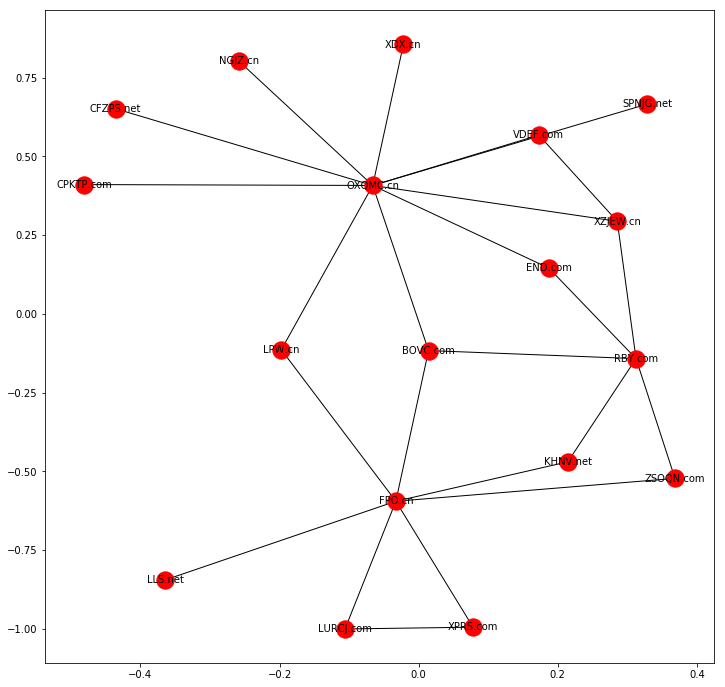

In [85]:
plt.figure(3, figsize=(12,12))
nx.draw_networkx(website_network, font_size=10)

In [86]:
sorted(nx.pagerank(website_network).items(), key=lambda x:x[1], reverse=True)

[('OXQMC.cn', 0.20518281840082545),
 ('FPO.cn', 0.1348680805278719),
 ('RBY.com', 0.09416726106820161),
 ('XZJEW.cn', 0.059956652748089145),
 ('BOVC.com', 0.05816011314717065),
 ('XPRS.com', 0.04297453484355794),
 ('LURCJ.com', 0.04297453484355794),
 ('VDEF.com', 0.04276170521182125),
 ('LPW.cn', 0.04215133290379691),
 ('END.com', 0.04178298919790549),
 ('ZSOQN.com', 0.04071923752597223),
 ('KHNV.net', 0.04071923752597223),
 ('NGJZ.cn', 0.025774208954531752),
 ('XDX.cn', 0.025774208954531752),
 ('CFZPS.net', 0.025774208954531752),
 ('SPNJG.net', 0.025774208954531752),
 ('CPKTP.com', 0.025774208954531752),
 ('LLS.net', 0.024710457282598495)]